In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
# Q1.

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# No missing values found in the dataset.

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(302, 14)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(labels=['target'], axis=1)
y = df['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [17]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [18]:
# Scaling the numerical features and automating feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [20]:
num_pipeline = Pipeline(
    
    steps = [
        
        ('scaler', StandardScaler())
    
    ]

)

cat_pipeline = Pipeline(
    
    steps = [
        
        ('onehotencoder', OneHotEncoder())
    
    ]

)

In [21]:
preprocessor = ColumnTransformer([
    
    ('num_pipeline', num_pipeline, numerical_cols),
    ('cat_pipeline', cat_pipeline, categorical_cols)

])

In [22]:
X_train_scaled = preprocessor.fit_transform(X_train)

In [23]:
X_train_scaled.shape

(211, 30)

In [24]:
X_test_scaled = preprocessor.transform(X_test)

In [25]:
# Q3.
from sklearn.ensemble import RandomForestClassifier

In [26]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=10)

In [27]:
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10)

In [28]:
y_pred = classifier.predict(X_test_scaled)

In [29]:
# Q4.

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
accuracy_rfc = accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred)
recall_rfc = recall_score(y_test, y_pred)
f1_score_rfc = f1_score(y_test, y_pred)
print(f"Accuracy Score: ", accuracy_rfc)
print(f"Precision Score: ", precision_rfc)
print(f"Recall Score: ", recall_rfc)
print(f"F1 Score: ", f1_score_rfc)

Accuracy Score:  0.8681318681318682
Precision Score:  0.8775510204081632
Recall Score:  0.8775510204081632
F1 Score:  0.8775510204081631


In [32]:
# Q5.
X_train_scaled_df = pd.DataFrame(X_train_scaled)
feature_names = list(X_train_scaled_df.columns)
feature_importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [33]:
top_features = feature_importance_df.head(5)

In [34]:
top_features

,Feature,Importance
3,3,0.101278
21,21,0.096378
4,4,0.089611
28,28,0.074687
2,2,0.069737


In [35]:
import matplotlib.pyplot as plt

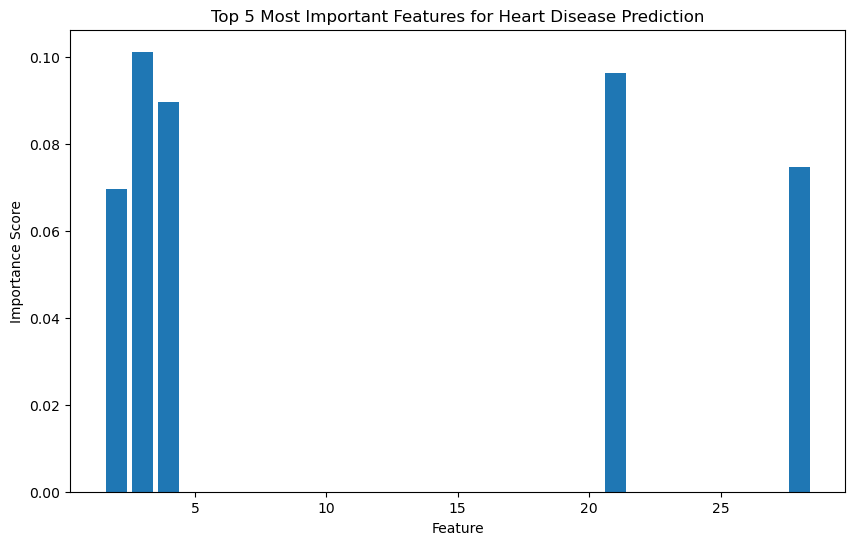

In [36]:
plt.figure(figsize=(10,6))
plt.bar(top_features['Feature'], top_features['Importance'])
plt.title('Top 5 Most Important Features for Heart Disease Prediction')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.show()

In [37]:
# Q6.
parameters = {'min_samples_split':[1,2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[1,2,3,4,5,6,7],
              'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
              'criterion':['gini','entropy','log_loss']
}

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
cv = RandomizedSearchCV(classifier, param_distributions=parameters,cv=5, scoring='accuracy', verbose=3)
cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.860 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.833 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.762 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.881 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.714 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.860 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.857 t

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [40]:
# Q7.
cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 6,
 'max_depth': 3,
 'criterion': 'entropy'}

In [41]:
y_pred_cv = cv.predict(X_test_scaled)

In [42]:
accuracy_rfc_cv = accuracy_score(y_test, y_pred_cv)
precision_rfc_cv = precision_score(y_test, y_pred_cv)
recall_rfc_cv = recall_score(y_test, y_pred_cv)
f1_score_rfc_cv = f1_score(y_test, y_pred_cv)
print(f"Accuracy Score: ", accuracy_rfc_cv)
print(f"Precision Score: ", precision_rfc_cv)
print(f"Recall Score: ", recall_rfc_cv)
print(f"F1 Score: ", f1_score_rfc_cv)

Accuracy Score:  0.8791208791208791
Precision Score:  0.88
Recall Score:  0.8979591836734694
F1 Score:  0.888888888888889


In [43]:
# Q8.

top_features = feature_importance_df.head(2)['Feature'].tolist()

In [66]:
top_features

[3, 21]

In [49]:
X_test_scaled_df = pd.DataFrame(X_test_scaled)

In [50]:
X_combined_scaled = pd.concat([X_train_scaled_df, X_test_scaled_df], axis=0, ignore_index=True)

In [51]:
X_selected = X_combined_scaled[top_features]

In [56]:
X_selected

,3,21
0,1.305768,1.0
1,2.341208,1.0
2,0.360366,1.0
3,0.450405,1.0
4,1.035653,0.0
...,...,...
297,-0.314921,0.0
298,0.045232,0.0
299,-0.359940,0.0
300,0.180290,1.0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [53]:
new_classifier = RandomForestClassifier()

In [54]:
new_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
x_min, x_max = X_selected[3].min() - 1, X_selected[3].max() + 1
y_min, y_max = X_selected[21].min() - 1, X_selected[21].max() + 1

In [63]:
import numpy as np

In [64]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = new_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

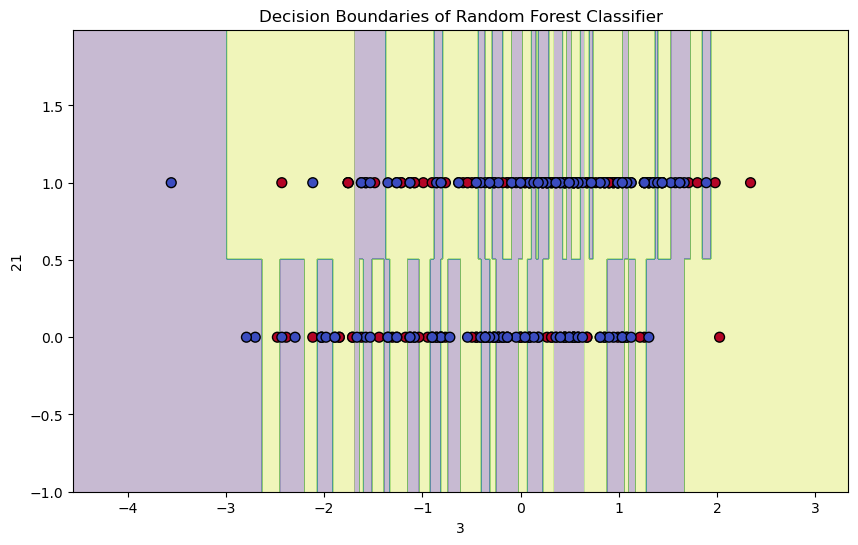

In [68]:
# Create a scatter plot
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Scatter plot of the data points
plt.scatter(X_selected[3], X_selected[21], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.title('Decision Boundaries of Random Forest Classifier')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.show()